<a href="https://colab.research.google.com/github/Mark12481632/Intro_ML/blob/main/Pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Imports:
# ========

import torch
import torch.nn as nn
import torch.utils.data as TensorData
import torch.utils.data as DataLoader
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Example tensors
data_lst_1 = [[1,2,3,4,5], [6,7,8,9,10]]
tensor_1 = torch.tensor(data_lst_1)
print(tensor_1)
print(tensor_1.shape, tensor_1.size(), tensor_1.dtype)

data_lst_2 = [[1,2,1,2,1], [4,4,1,2,3]]
tensor_2 = torch.tensor(data_lst_2)
print(tensor_2)
print(tensor_2.shape, tensor_2.size(), tensor_2.dtype)

# Element by element operations possible with same shape tensors:
print(tensor_1 + tensor_2)
print(tensor_1 - tensor_2)
print(tensor_1 * tensor_2)
print(tensor_1 / tensor_2)

# Tensor multiplication.
print(tensor_1 + tensor_2)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])
torch.Size([2, 5]) torch.Size([2, 5]) torch.int64
tensor([[1, 2, 1, 2, 1],
        [4, 4, 1, 2, 3]])
torch.Size([2, 5]) torch.Size([2, 5]) torch.int64
tensor([[ 2,  4,  4,  6,  6],
        [10, 11,  9, 11, 13]])
tensor([[0, 0, 2, 2, 4],
        [2, 3, 7, 7, 7]])
tensor([[ 1,  4,  3,  8,  5],
        [24, 28,  8, 18, 30]])
tensor([[1.0000, 1.0000, 3.0000, 2.0000, 5.0000],
        [1.5000, 1.7500, 8.0000, 4.5000, 3.3333]])
tensor([[ 2,  4,  4,  6,  6],
        [10, 11,  9, 11, 13]])


In [17]:
# Create simple NN

input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

linear_layer = nn.Linear(in_features=3, out_features=2)
output = linear_layer(input_tensor)
print(output)

print(linear_layer.weight)
print(linear_layer.bias)

tensor([[-0.4696,  0.5197]], grad_fn=<AddmmBackward0>)
Parameter containing:
tensor([[-0.0575, -0.5755,  0.1649],
        [-0.2138,  0.1136, -0.0937]], requires_grad=True)
Parameter containing:
tensor([-0.1492,  0.5201], requires_grad=True)


In [23]:
# Adding layers to network:
n_features = 8
n_classes = 2

# nn.Linear(8, 4) means this layer has 4 neurons.
#                 Each neuron has 9 (8+1 bias) inputs.
#                 Hence, total of 4 * 9 = 36 params required.

# Number of inputs at layer (n+1) must = number outputs of layer n.
model = nn.Sequential(nn.Linear(n_features, 4),
                      nn.Linear(4, n_classes))

# Above model has (8+1) * 4 + (4+1)*2 = 36 + 10 = 46 params to train in total.

print(model)

# Show number of params needed to be trainied using numel():
total = 0
for param in model.parameters():
    total += param.numel()
print(total)

Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=2, bias=True)
)
46


In [40]:
# Read in data file.
# Note: type (0 => bird), (1 => mammal), (2 => reptile)
data = pd.read_csv("https://raw.githubusercontent.com/Mark12481632/Intro_ML/refs/heads/main/animals.csv")
data = data.iloc[:, 1:]
X = data.to_numpy()
print(X)

y = data.iloc[:, -1].to_numpy()
print(y)

# Create Tensors for features and results
dataset = TensorData.TensorDataset(torch.tensor(X), torch.tensor(y))

input_sample, label_sample = dataset[0]
print("Input-Sample:", input_sample)
print("Label-Sample:", label_sample)

[[0 1 1 0 0 2 1 0]
 [0 1 1 0 1 2 1 0]
 [1 0 0 1 1 4 1 1]
 [1 0 0 1 0 4 1 1]
 [0 0 1 0 1 4 1 2]]
[0 0 1 1 2]
Input-Sample: tensor([0, 1, 1, 0, 0, 2, 1, 0])
Label-Sample: tensor(0)


In [41]:
# Dataset creation
# Terms:
#   1 epoch is one full pass through the DataLoader.
#   Generalization means that the model performs well on unseen data.

batch_size = 2 # Number trainiung samples per iteration
shuffle =True  # Randomize data order.

# dataloader
dataloader = DataLoader.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

for batch_inputs, batch_labels in dataloader:
    print(batch_inputs)
    print(batch_labels)

tensor([[1, 0, 0, 1, 1, 4, 1, 1],
        [0, 1, 1, 0, 1, 2, 1, 0]])
tensor([1, 0])
tensor([[1, 0, 0, 1, 0, 4, 1, 1],
        [0, 0, 1, 0, 1, 4, 1, 2]])
tensor([1, 2])
tensor([[0, 1, 1, 0, 0, 2, 1, 0]])
tensor([0])


In [72]:
# Training.
# Here we are looking at a Regression Problem.  In this case, can use an MSE loss function (params not categorical)
# and a Linear Layer as final output layer.
# Idea to predicet salary in USD.
# As a pure regression problem - no one-hot encoding.

data = pd.read_csv("https://raw.githubusercontent.com/Mark12481632/Intro_ML/refs/heads/main/Salary_Dataset.csv")
features = data.iloc[:, :-1].to_numpy()
target = data.iloc[:, -1].to_numpy()

# Normnalize salaries as a lot of variation:
target = (target - target.mean()) / target.std()

# Create dataset as Tensor.
dataset = TensorData.TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())

# Create the data loader.
dataloader = DataLoader.DataLoader(dataset, batch_size=10, shuffle=True)

# Create the model.
# We have 4 input features and 1 output target.
model = nn.Sequential(nn.Linear(4, 1))

# Create Loss & Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 60
for epoch in range(num_epochs):
    for batch_inputs, batch_labels in dataloader:
        optimizer.zero_grad()

        prediction = model(batch_inputs)
        loss = criterion(prediction, batch_labels.view(-1, 1))

        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 0.8447219729423523
Epoch: 1, Loss: 0.8563851118087769
Epoch: 2, Loss: 0.4966157078742981
Epoch: 3, Loss: 1.4649244546890259
Epoch: 4, Loss: 0.6189554929733276
Epoch: 5, Loss: 0.8944960832595825
Epoch: 6, Loss: 0.7100924253463745
Epoch: 7, Loss: 0.5828561186790466
Epoch: 8, Loss: 0.36097702383995056
Epoch: 9, Loss: 1.1977468729019165
Epoch: 10, Loss: 1.5176490545272827
Epoch: 11, Loss: 1.4484665393829346
Epoch: 12, Loss: 1.3265433311462402
Epoch: 13, Loss: 1.8744666576385498
Epoch: 14, Loss: 1.2621160745620728
Epoch: 15, Loss: 0.7123546600341797
Epoch: 16, Loss: 1.5905251502990723
Epoch: 17, Loss: 1.160337209701538
Epoch: 18, Loss: 1.048466444015503
Epoch: 19, Loss: 0.9613531827926636
Epoch: 20, Loss: 1.6253544092178345
Epoch: 21, Loss: 0.5928784012794495
Epoch: 22, Loss: 1.7371711730957031
Epoch: 23, Loss: 1.1155179738998413
Epoch: 24, Loss: 1.2848358154296875
Epoch: 25, Loss: 0.3910819888114929
Epoch: 26, Loss: 0.6651512384414673
Epoch: 27, Loss: 2.127248525619507
Epoc

In [79]:
# Apply to some test values & get predictions
# We have 100 sample records - so lets take 10 samples
sample_index = np.random.randint(0, 100, 10)

sample_features = features[sample_index, :]
sample_targets = target[sample_index]

sample_inputs = torch.tensor(sample_features).float()
sample_predictions = model(sample_inputs)

# Show comparison:
for i in range(10):
    print(f"Prediction: {sample_predictions[i].item()}, Target: {sample_targets[i]}")

Prediction: 0.28350308537483215, Target: 0.06630852345093007
Prediction: 0.034287869930267334, Target: 1.9554844143660706
Prediction: 0.26198050379753113, Target: 1.5320255276802854
Prediction: 0.048206984996795654, Target: -2.2529704835436015
Prediction: -0.07723088562488556, Target: -0.6766935022046519
Prediction: -0.294526606798172, Target: -0.3890426643241613
Prediction: 0.45484718680381775, Target: 0.13461120161719375
Prediction: 0.26198050379753113, Target: 1.5320255276802854
Prediction: -0.07159090042114258, Target: -0.11609772083485069
Prediction: -0.04894255846738815, Target: -1.2175337748441328


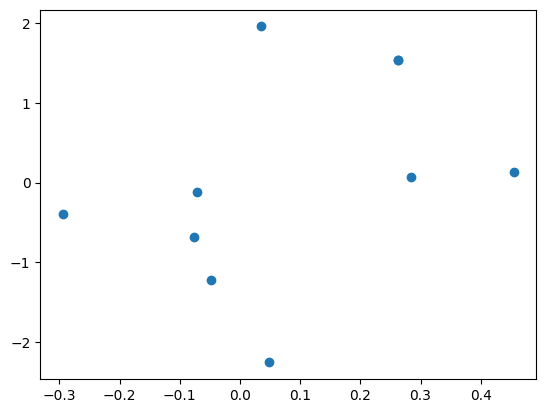

In [88]:
X = [x.item() for x in sample_predictions]
y = [x for x in sample_targets]

plt.scatter(X, y)

In [89]:
X

[0.28350308537483215,
 0.034287869930267334,
 0.26198050379753113,
 0.048206984996795654,
 -0.07723088562488556,
 -0.294526606798172,
 0.45484718680381775,
 0.26198050379753113,
 -0.07159090042114258,
 -0.04894255846738815]